In [100]:
#instalacja pakietow
!pip install kaggle
!pip install pandas
!pip install unzip
!pip install scikit-learn
!pip install seaborn

In [101]:
#Pobranie zbioru
!kaggle datasets download -d sohier/crime-in-baltimore

crime-in-baltimore.zip: Skipping, found more recently modified local copy (use --force to force download)


In [102]:
!unzip -o crime-in-baltimore.zip

Archive:  crime-in-baltimore.zip
  inflating: BPD_Part_1_Victim_Based_Crime_Data.csv  


In [103]:
! grep -P "^$" -n BPD_Part_1_Victim_Based_Crime_Data.csv

In [104]:
import pandas as pd

In [105]:
baltimore=pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
baltimore

CrimeDate CrimeTime CrimeCode               Location  \
0       09/02/2017  23:30:00       3JK        4200 AUDREY AVE   
1       09/02/2017  23:00:00        7A      800 NEWINGTON AVE   
2       09/02/2017  22:53:00        9S          600 RADNOR AV   
3       09/02/2017  22:50:00        4C         1800 RAMSAY ST   
4       09/02/2017  22:31:00        4E           100 LIGHT ST   
...            ...       ...       ...                    ...   
276524  01/01/2012  00:00:00        6J           1400 JOH AVE   
276525  01/01/2012  00:00:00        6J       5500 SINCLAIR LN   
276526  01/01/2012  00:00:00        6E  400 N PATTERSON PK AV   
276527  01/01/2012  00:00:00        5A        5800 LILLYAN AV   
276528  01/01/2012  00:00:00        5A      1900 GRINNALDS AV   

                Description Inside/Outside   Weapon   Post      District  \
0       ROBBERY - RESIDENCE              I    KNIFE  913.0      SOUTHERN   
1                AUTO THEFT              O      NaN  133.0       CENTRAL   
2                  SHOOTING        Outside  FIREARM  524.0      NORTHERN   
3              AGG. ASSAULT              I    OTHER  934.0      SOUTHERN   
4            COMMON ASSAULT              O    HANDS  113.0       CENTRAL   
...                     ...            ...      ...    ...           ...   
276524              LARCENY              I      NaN  832.0  SOUTHWESTERN   
276525              LARCENY              O      NaN  444.0  NORTHEASTERN   
276526              LARCENY              O      NaN  321.0       EASTERN   
276527             BURGLARY              I      NaN  425.0  NORTHEASTERN   
276528             BURGLARY              I      NaN  831.0  SOUTHWESTERN   

            Neighborhood  Longitude  Latitude  \
0               Brooklyn  -76.60541  39.22951   
1         Reservoir Hill  -76.63217  39.31360   
2         Winston-Govans  -76.60697  39.34768   
3       Carrollton Ridge  -76.64526  39.28315   
4          Downtown West  -76.61365  39.28756   
...                  ...        ...       ...   
276524       Violetville  -76.67195  39.26132   
276525         Frankford  -76.53829  39.32493   
276526              CARE  -76.58497  39.29573   
276527    Glenham-Belhar  -76.54578  39.34701   
276528      Morrell Park  -76.65094  39.26698   

                             Location 1     Premise  Total Incidents  
0       (39.2295100000, -76.6054100000)  ROW/TOWNHO                1  
1       (39.3136000000, -76.6321700000)      STREET                1  
2       (39.3476800000, -76.6069700000)      Street                1  
3       (39.2831500000, -76.6452600000)  ROW/TOWNHO                1  
4       (39.2875600000, -76.6136500000)      STREET                1  
...                                 ...         ...              ...  
276524  (39.2613200000, -76.6719500000)  OTHER - IN                1  
276525  (39.3249300000, -76.5382900000)  OTHER - OU                1  
276526  (39.2957300000, -76.5849700000)      STREET                1  
276527  (39.3470100000, -76.5457800000)  APT. LOCKE                1  
276528  (39.2669800000, -76.6509400000)  ROW/TOWNHO                1  

[276529 rows x 15 columns]

In [106]:
baltimore.isnull().sum()

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             2207
Description             0
Inside/Outside      10279
Weapon             180952
Post                  224
District               80
Neighborhood         2740
Longitude            2204
Latitude             2204
Location 1           2204
Premise             10757
Total Incidents         0
dtype: int64

In [107]:
# W wiekszosci przestepstw nie uzywa sie broni, zastepujemy
# puste pola przez None
baltimore["Weapon"].fillna("None", inplace=True)

In [108]:
baltimore.isnull().sum()

CrimeDate              0
CrimeTime              0
CrimeCode              0
Location            2207
Description            0
Inside/Outside     10279
Weapon                 0
Post                 224
District              80
Neighborhood        2740
Longitude           2204
Latitude            2204
Location 1          2204
Premise            10757
Total Incidents        0
dtype: int64

In [109]:
#Wyczyszczenie zbioru z artefaktow
baltimore.dropna(inplace=True)

In [110]:
baltimore.isnull().sum()

CrimeDate          0
CrimeTime          0
CrimeCode          0
Location           0
Description        0
Inside/Outside     0
Weapon             0
Post               0
District           0
Neighborhood       0
Longitude          0
Latitude           0
Location 1         0
Premise            0
Total Incidents    0
dtype: int64

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
#Normalizacja
baltimore['Post'] = baltimore['Post'] /baltimore['Post'].abs().max()
baltimore['Location']=baltimore['Location'].str.lower()
baltimore['Description']=baltimore['Description'].str.lower()
baltimore['Weapon']=baltimore['Weapon'].str.lower()
baltimore['Premise']=baltimore['Premise'].str.lower()
baltimore['District']=baltimore['District'].str.lower()
baltimore['CrimeCode']=baltimore['CrimeCode'].str.lower()
baltimore['Neighborhood']=baltimore['Neighborhood'].str.lower()
baltimore['Inside/Outside']=baltimore['Inside/Outside'].str.lower()

<Axes: >

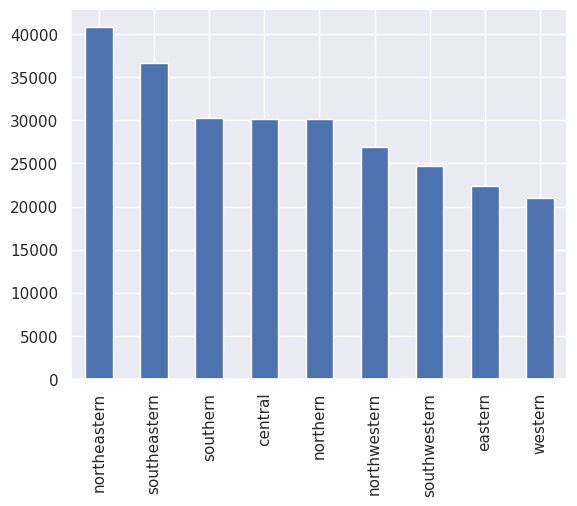

In [113]:
baltimore['District'].value_counts().plot(kind="bar")

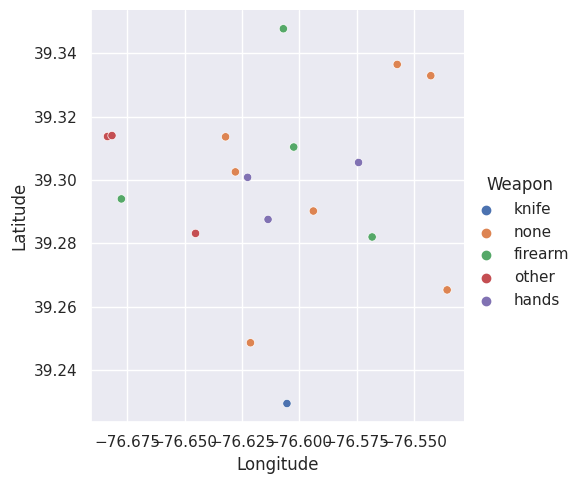

In [114]:
import seaborn as sns
sns.set_theme()
sns.relplot(data=baltimore[:20], x='Longitude', y='Latitude', hue='Weapon')

In [115]:
#Podzial na zbiory
baltimore_train, baltimore_test = train_test_split(baltimore, test_size=0.1, random_state=1)

In [116]:
baltimore_test

CrimeDate CrimeTime CrimeCode              Location  \
20700   04/10/2017  22:26:00        4e       4900 eastern av   
63746   06/05/2016  20:44:00        4e     3000 s hanover st   
169854  03/10/2014  20:00:00        4e      4100 parkside dr   
42473   10/31/2016  09:30:00        4e  5600 loch raven blvd   
86103   12/05/2015  08:15:00        4e     1100 guilford ave   
...            ...       ...       ...                   ...   
182763  11/20/2013  20:00:00        6d      3800 dolfield av   
14972   05/22/2017  03:30:00        4c   3000 w garrison ave   
44956   10/15/2016  23:30:00        7a           500 jack st   
36873   12/08/2016  18:30:00        4e    3800 cedarhurst rd   
230084  12/06/2012  14:00:00        4e     800 s highland av   

              Description Inside/Outside Weapon      Post      District  \
20700      common assault              o  hands  0.256628  southeastern   
63746      common assault              o  hands  0.977731      southern   
169854     common assault              o  hands  0.447508  northeastern   
42473      common assault              i  hands  0.440085  northeastern   
86103      common assault              i  hands  0.149523       central   
...                   ...            ...    ...       ...           ...   
182763  larceny from auto              o   none  0.681866  northwestern   
14972        agg. assault              i  other  0.651113  northwestern   
44956          auto theft              o   none  0.968187      southern   
36873      common assault              o  hands  0.451750  northeastern   
230084     common assault              i  hands  0.246023  southeastern   

                     Neighborhood  Longitude  Latitude  \
20700                   greektown  -76.55422  39.28706   
63746   middle branch/reedbird pa  -76.61504  39.25134   
169854            belair-parkside  -76.56605  39.32783   
42473                  loch raven  -76.58856  39.35952   
86103          mid-town belvedere  -76.61194  39.30319   
...                           ...        ...       ...   
182763                   dolfield  -76.68090  39.33938   
14972        central park heights  -76.67146  39.34863   
44956                    brooklyn  -76.60582  39.23265   
36873                  waltherson  -76.56315  39.33720   
230084                     canton  -76.56878  39.28342   

                             Location 1     Premise  Total Incidents  
20700   (39.2870600000, -76.5542200000)       alley                1  
63746   (39.2513400000, -76.6150400000)      street                1  
169854  (39.3278300000, -76.5660500000)      street                1  
42473   (39.3595200000, -76.5885600000)  hotel/mote                1  
86103   (39.3031900000, -76.6119400000)   apt/condo                1  
...                                 ...         ...              ...  
182763  (39.3393800000, -76.6809000000)      street                1  
14972   (39.3486300000, -76.6714600000)  row/townho                1  
44956   (39.2326500000, -76.6058200000)      street                1  
36873   (39.3372000000, -76.5631500000)      street                1  
230084  (39.2834200000, -76.5687800000)      school                1  

[26312 rows x 15 columns]

In [117]:
baltimore_train, baltimore_val= train_test_split(baltimore_train, test_size=0.25, random_state=1)

In [118]:
baltimore.describe(include='all')

CrimeDate CrimeTime CrimeCode        Location Description  \
count       263118    263118    263118          263118      263118   
unique        2072      2935        80           25276          15   
top     04/27/2015  18:00:00        4e  200 e pratt st     larceny   
freq           407      6483     43093             632       58246   
mean           NaN       NaN       NaN             NaN         NaN   
std            NaN       NaN       NaN             NaN         NaN   
min            NaN       NaN       NaN             NaN         NaN   
25%            NaN       NaN       NaN             NaN         NaN   
50%            NaN       NaN       NaN             NaN         NaN   
75%            NaN       NaN       NaN             NaN         NaN   
max            NaN       NaN       NaN             NaN         NaN   

       Inside/Outside  Weapon           Post      District Neighborhood  \
count          263118  263118  263118.000000        263118       263118   
unique              4       5            NaN             9          278   
top                 i    none            NaN  northeastern     downtown   
freq           131015  173175            NaN         40842         8701   
mean              NaN     NaN       0.536416           NaN          NaN   
std               NaN     NaN       0.276554           NaN          NaN   
min               NaN     NaN       0.117709           NaN          NaN   
25%               NaN     NaN       0.256628           NaN          NaN   
50%               NaN     NaN       0.541888           NaN          NaN   
75%               NaN     NaN       0.775186           NaN          NaN   
max               NaN     NaN       1.000000           NaN          NaN   

            Longitude       Latitude                       Location 1 Premise  \
count   263118.000000  263118.000000                           263118  263118   
unique            NaN            NaN                            93543     118   
top               NaN            NaN  (39.3180000000, -76.6582100000)  street   
freq              NaN            NaN                              503  102544   
mean       -76.617469      39.307456                              NaN     NaN   
std          0.042220       0.029537                              NaN     NaN   
min        -76.711280      39.200410                              NaN     NaN   
25%        -76.648420      39.288340                              NaN     NaN   
50%        -76.614010      39.303680                              NaN     NaN   
75%        -76.587490      39.327890                              NaN     NaN   
max        -76.529770      39.371980                              NaN     NaN   

        Total Incidents  
count          263118.0  
unique              NaN  
top                 NaN  
freq                NaN  
mean                1.0  
std                 0.0  
min                 1.0  
25%                 1.0  
50%                 1.0  
75%                 1.0  
max                 1.0

In [119]:
baltimore_test.describe(include='all')

CrimeDate CrimeTime CrimeCode         Location Description  \
count        26312     26312     26312            26312       26312   
unique        2071      1513        71            11180          15   
top     04/27/2015  18:00:00        4e  1500 russell st     larceny   
freq            28       650      4357               56        5740   
mean           NaN       NaN       NaN              NaN         NaN   
std            NaN       NaN       NaN              NaN         NaN   
min            NaN       NaN       NaN              NaN         NaN   
25%            NaN       NaN       NaN              NaN         NaN   
50%            NaN       NaN       NaN              NaN         NaN   
75%            NaN       NaN       NaN              NaN         NaN   
max            NaN       NaN       NaN              NaN         NaN   

       Inside/Outside Weapon          Post      District Neighborhood  \
count           26312  26312  26312.000000         26312        26312   
unique              4      5           NaN             9          276   
top                 i   none           NaN  northeastern     downtown   
freq            13248  17358           NaN          4137          853   
mean              NaN    NaN      0.535663           NaN          NaN   
std               NaN    NaN      0.275572           NaN          NaN   
min               NaN    NaN      0.117709           NaN          NaN   
25%               NaN    NaN      0.257688           NaN          NaN   
50%               NaN    NaN      0.541888           NaN          NaN   
75%               NaN    NaN      0.766702           NaN          NaN   
max               NaN    NaN      1.000000           NaN          NaN   

           Longitude      Latitude                       Location 1 Premise  \
count   26312.000000  26312.000000                            26312   26312   
unique           NaN           NaN                            18843     104   
top              NaN           NaN  (39.3180000000, -76.6582100000)  street   
freq             NaN           NaN                               49   10075   
mean      -76.617518     39.307771                              NaN     NaN   
std         0.042479      0.029477                              NaN     NaN   
min       -76.711220     39.200470                              NaN     NaN   
25%       -76.648905     39.288490                              NaN     NaN   
50%       -76.614170     39.303850                              NaN     NaN   
75%       -76.587170     39.328290                              NaN     NaN   
max       -76.529770     39.371970                              NaN     NaN   

        Total Incidents  
count           26312.0  
unique              NaN  
top                 NaN  
freq                NaN  
mean                1.0  
std                 0.0  
min                 1.0  
25%                 1.0  
50%                 1.0  
75%                 1.0  
max                 1.0

In [120]:
baltimore_train.describe(include='all')

CrimeDate CrimeTime CrimeCode        Location Description  \
count       177604    177604    177604          177604      177604   
unique        2072      2435        79           22781          15   
top     04/27/2015  18:00:00        4e  200 e pratt st     larceny   
freq           298      4340     29065             440       39287   
mean           NaN       NaN       NaN             NaN         NaN   
std            NaN       NaN       NaN             NaN         NaN   
min            NaN       NaN       NaN             NaN         NaN   
25%            NaN       NaN       NaN             NaN         NaN   
50%            NaN       NaN       NaN             NaN         NaN   
75%            NaN       NaN       NaN             NaN         NaN   
max            NaN       NaN       NaN             NaN         NaN   

       Inside/Outside  Weapon           Post      District Neighborhood  \
count          177604  177604  177604.000000        177604       177604   
unique              4       5            NaN             9          278   
top                 i    none            NaN  northeastern     downtown   
freq            88319  116884            NaN         27451         5877   
mean              NaN     NaN       0.536132           NaN          NaN   
std               NaN     NaN       0.276695           NaN          NaN   
min               NaN     NaN       0.117709           NaN          NaN   
25%               NaN     NaN       0.256628           NaN          NaN   
50%               NaN     NaN       0.541888           NaN          NaN   
75%               NaN     NaN       0.775186           NaN          NaN   
max               NaN     NaN       1.000000           NaN          NaN   

            Longitude       Latitude                       Location 1 Premise  \
count   177604.000000  177604.000000                           177604  177604   
unique            NaN            NaN                            74417     116   
top               NaN            NaN  (39.3180000000, -76.6582100000)  street   
freq              NaN            NaN                              337   69325   
mean       -76.617452      39.307395                              NaN     NaN   
std          0.042192       0.029526                              NaN     NaN   
min        -76.711280      39.200410                              NaN     NaN   
25%        -76.648290      39.288330                              NaN     NaN   
50%        -76.613990      39.303580                              NaN     NaN   
75%        -76.587500      39.327742                              NaN     NaN   
max        -76.529770      39.371970                              NaN     NaN   

        Total Incidents  
count          177604.0  
unique              NaN  
top                 NaN  
freq                NaN  
mean                1.0  
std                 0.0  
min                 1.0  
25%                 1.0  
50%                 1.0  
75%                 1.0  
max                 1.0

In [121]:
baltimore_val.describe(include='all')

CrimeDate CrimeTime CrimeCode        Location Description  \
count        59202     59202     59202           59202       59202   
unique        2070      1804        77           16050          15   
top     04/27/2015  18:00:00        4e  200 e pratt st     larceny   
freq            81      1493      9671             140       13219   
mean           NaN       NaN       NaN             NaN         NaN   
std            NaN       NaN       NaN             NaN         NaN   
min            NaN       NaN       NaN             NaN         NaN   
25%            NaN       NaN       NaN             NaN         NaN   
50%            NaN       NaN       NaN             NaN         NaN   
75%            NaN       NaN       NaN             NaN         NaN   
max            NaN       NaN       NaN             NaN         NaN   

       Inside/Outside Weapon          Post      District Neighborhood  \
count           59202  59202  59202.000000         59202        59202   
unique              4      5           NaN             9          276   
top                 i   none           NaN  northeastern     downtown   
freq            29448  38933           NaN          9254         1971   
mean              NaN    NaN      0.537601           NaN          NaN   
std               NaN    NaN      0.276567           NaN          NaN   
min               NaN    NaN      0.117709           NaN          NaN   
25%               NaN    NaN      0.257688           NaN          NaN   
50%               NaN    NaN      0.541888           NaN          NaN   
75%               NaN    NaN      0.775186           NaN          NaN   
max               NaN    NaN      1.000000           NaN          NaN   

           Longitude      Latitude                       Location 1 Premise  \
count   59202.000000  59202.000000                            59202   59202   
unique           NaN           NaN                            35435     112   
top              NaN           NaN  (39.3180000000, -76.6582100000)  street   
freq             NaN           NaN                              117   23144   
mean      -76.617499     39.307502                              NaN     NaN   
std         0.042191      0.029595                              NaN     NaN   
min       -76.711270     39.202540                              NaN     NaN   
25%       -76.648500     39.288340                              NaN     NaN   
50%       -76.614020     39.303930                              NaN     NaN   
75%       -76.587592     39.328030                              NaN     NaN   
max       -76.529770     39.371980                              NaN     NaN   

        Total Incidents  
count           59202.0  
unique              NaN  
top                 NaN  
freq                NaN  
mean                1.0  
std                 0.0  
min                 1.0  
25%                 1.0  
50%                 1.0  
75%                 1.0  
max                 1.0